<a href="https://colab.research.google.com/github/deepd1534/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# HOTEL BOOKING ANALYSIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#READING THE DATASET
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Datasets/Hotel Bookings.csv')

In [ ]:
#CHECKING 10 RANDOM ROWS
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
45189,City Hotel,1,45,2015,October,43,22,0,3,2,...,No Deposit,9.0,NaN,0,Contract,94.50,0,2,Canceled,2015-09-16
58044,City Hotel,1,33,2016,October,41,5,0,4,1,...,No Deposit,9.0,NaN,0,Transient,157.50,0,1,Canceled,2016-09-06
107639,City Hotel,0,22,2017,March,11,15,0,1,1,...,No Deposit,NaN,433.0,0,Transient,65.00,0,0,Check-Out,2017-03-16
79928,City Hotel,0,21,2015,November,45,5,0,2,2,...,No Deposit,11.0,NaN,0,Transient,76.00,0,0,Check-Out,2015-11-07
41555,City Hotel,0,14,2015,August,34,18,0,2,2,...,No Deposit,9.0,NaN,0,Contract,80.00,0,1,Check-Out,2015-08-20
112091,City Hotel,0,1,2017,May,20,20,2,1,1,...,No Deposit,NaN,NaN,0,Transient,110.00,0,0,Check-Out,2017-05-23
107753,City Hotel,0,55,2017,March,10,11,2,5,2,...,No Deposit,9.0,NaN,0,Transient,102.00,0,1,Check-Out,2017-03-18
47778,City Hotel,0,74,2016,March,10,3,1,3,2,...,No Deposit,14.0,NaN,0,Transient,65.75,0,0,Check-Out,2016-03-07
116649,City Hotel,0,15,2017,July,29,20,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-07-23
102039,City Hotel,0,15,2016,November,47,19,2,1,2,...,No Deposit,9.0,NaN,0,Transient,99.67,0,2,Check-Out,2016-11-22


In [ ]:
#CHECKING THE SHAPE OF THE DATASET
df.shape

(119390, 32)

In [ ]:
#PRINTING DF.INFO

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#PRINTING STATISTICS OF NUMERICAL VALUES
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


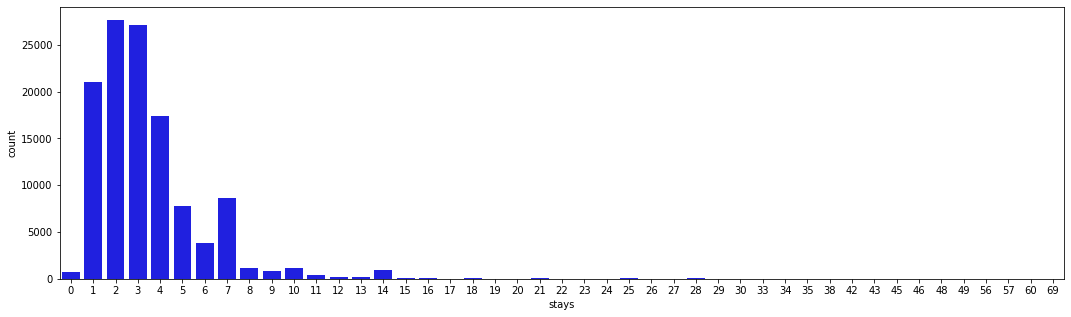

In [ ]:
#STAYS VS COUNT 
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(18,5))
sns.countplot(x=df['stays'], color='b')
plt.show()

**Conclusion :**

Most number of people stay for 2-3 days in the hotels

# UNIVARIATE ANALYSIS

In [ ]:
#DIFFERENT COUNTRIES IN THE DATASET
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

- So we have data from 12 different countries.

In [ ]:
#CHECKING FOR MISSING VALUES
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Text(0, 0.5, 'Count')

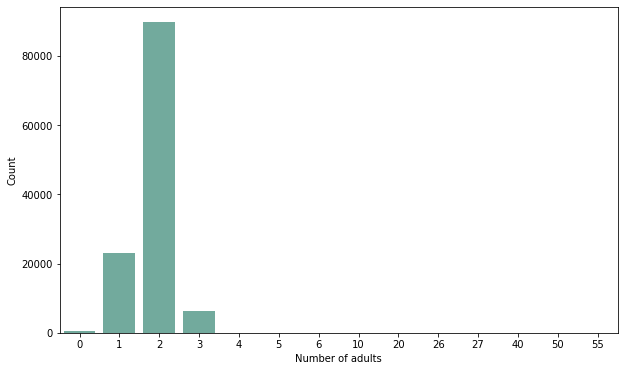

In [ ]:
#NUMBER OF ADULTS VS COUNT
plt.figure(figsize=(10, 6))

# plot a bar chart
sns.barplot(
    y='adults',
    x='index', 
    data=df['adults'].value_counts().reset_index(), 
    ci=None, 
    color='#69b3a2');

plt.xlabel("Number of adults")
plt.ylabel("Count")

**Conclusion:**

From the above visualization, we can deduce that majority of hotel bookers go in pairs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


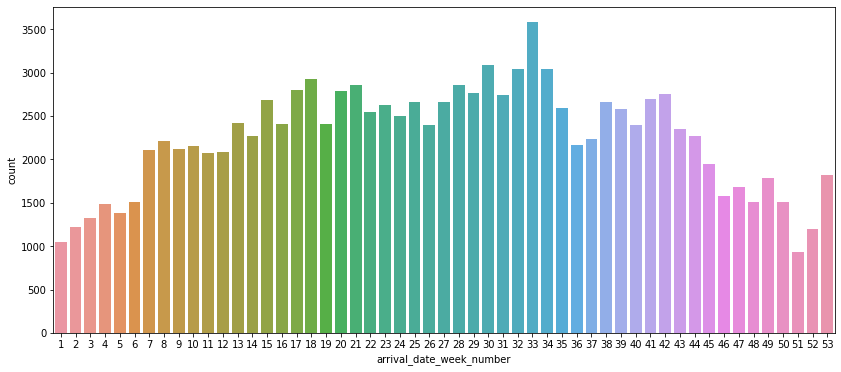

In [ ]:
#ARRIVAL DATE WEEK NUMBER VS COUNT
plt.figure(figsize=(14, 6))
sns.countplot(df['arrival_date_week_number'])

**Conclusion:**

The weeks 29-34 is the peak time for hotel bookings.

## In which months are the Hotel Bookings more?

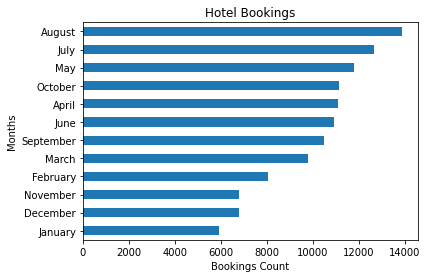

In [ ]:


# MONTHS VS BOOKINGS
df['arrival_date_month'].value_counts().sort_values().plot(kind = 'barh')

plt.title("Hotel Bookings")
plt.xlabel("Bookings Count")
plt.ylabel("Months")
# Show graph
plt.show()

**Conclusion:**

So we have most bookings in the months of August, July and May

### Bookings in Resort Hotels and City Hotels

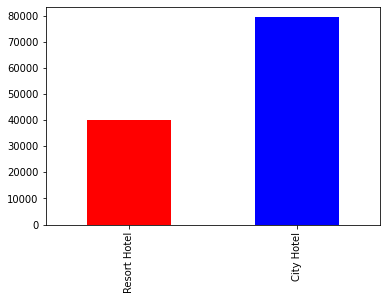

In [ ]:
#BOOKINGS IN CITY HOTELS VS RESORT HOTELS
df['hotel'].value_counts().sort_values().plot(kind = 'bar', color = ['red','blue'])

**Conclusion:**

Deducing from the above plot, people prefer City Hotels to Resort Hotels (Price maybe a factor, We'll try to find relationship between bookings in Resorts and city hotels)

### How many transactions have repeated guests?

In [ ]:
#NUMBER OF REPEATED GUESTS
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

### Boxplot of lead time

In [ ]:
df['lead_time'].mean()

104.01141636652986

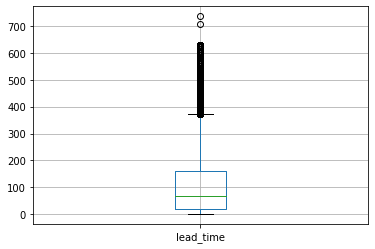

In [ ]:
#BOXPLOT OF LEAD_TIME
df.boxplot(column=['lead_time'])

We see that the average lead time is 104 days. The median lead time is above 50 days. There are many outliers as well.

### Types of meals

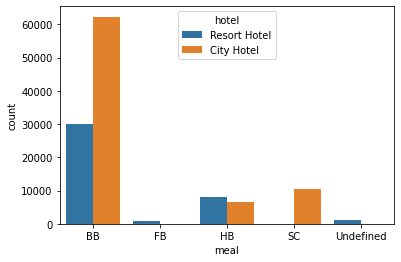

In [ ]:
#DIFFERENT TYPES OF MEALS IN HOTELS
sns.countplot(x = df['meal'], hue = df['hotel'])

What does RO, BB, HB, FB, AI on my hotel voucher?
These indicate the board basis booked:

- RO: Room only

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Breakfast, Lunch and Dinner)

- AI: All Inclusive (all services of full board plus any others specified in each case)

So BB is mostly preferred followed by HB, FB is rarely preferred.

### Room types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


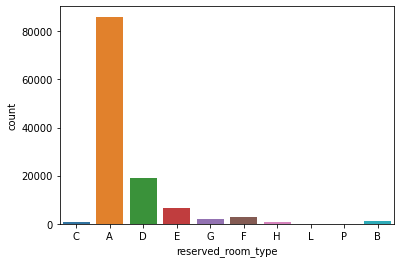

In [ ]:
#ROOM TYPES
sns.countplot(df['reserved_room_type'])


**Conclusion:**

Room type A is mostly preferred !

### Histogram of Average Daily Rate

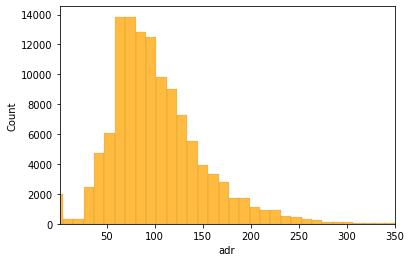

In [ ]:

#AVERAGE DAILY RATE (HISTOGRAM)
ax = sns.histplot(data = df, x='adr',bins=500,color='orange',edgecolor = 'k')  # distplot is deprecate and replaced by histplot
ax.set_xlim(1,350)

plt.show()

**Conclusion :** 

So, on an average the average daily rate of hotels lie in the range 60-100

### Market Segments

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


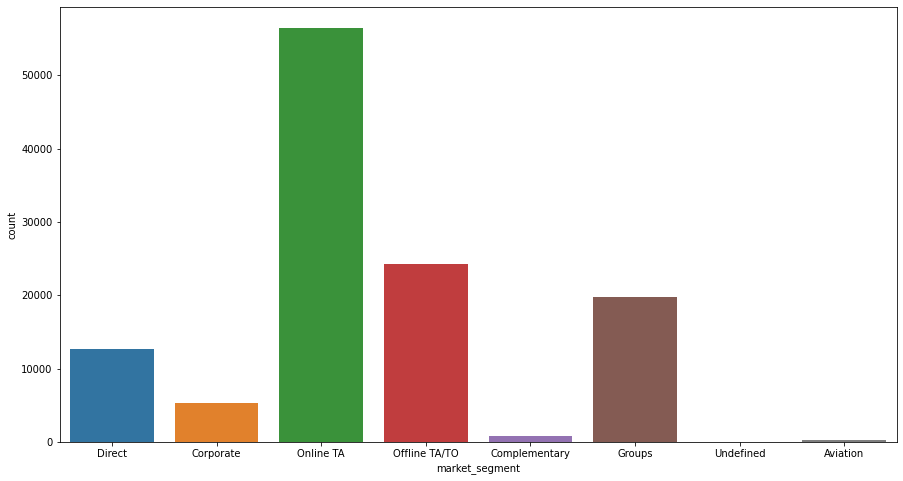

In [ ]:
#MAJOR MARKET SEGMENTS
plt.figure(figsize=(15, 8))
sns.countplot(df['market_segment'])

**Conclusion:**

Mostly, Online TA/TP segments followed by Groups, Direct and corporate segments book hotels the most.

### Types of customers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


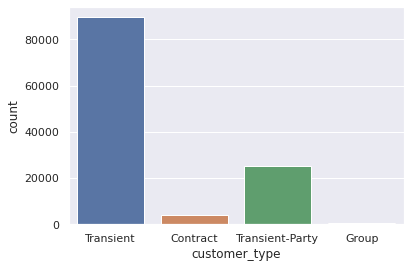

In [ ]:
#DIFFERENT TYPES OF CUSTOMERS
sns.set_theme(style="darkgrid")
sns.countplot(df['customer_type'])

# BIVARIATE ANALYSIS

## CORRELATION HEATMAP

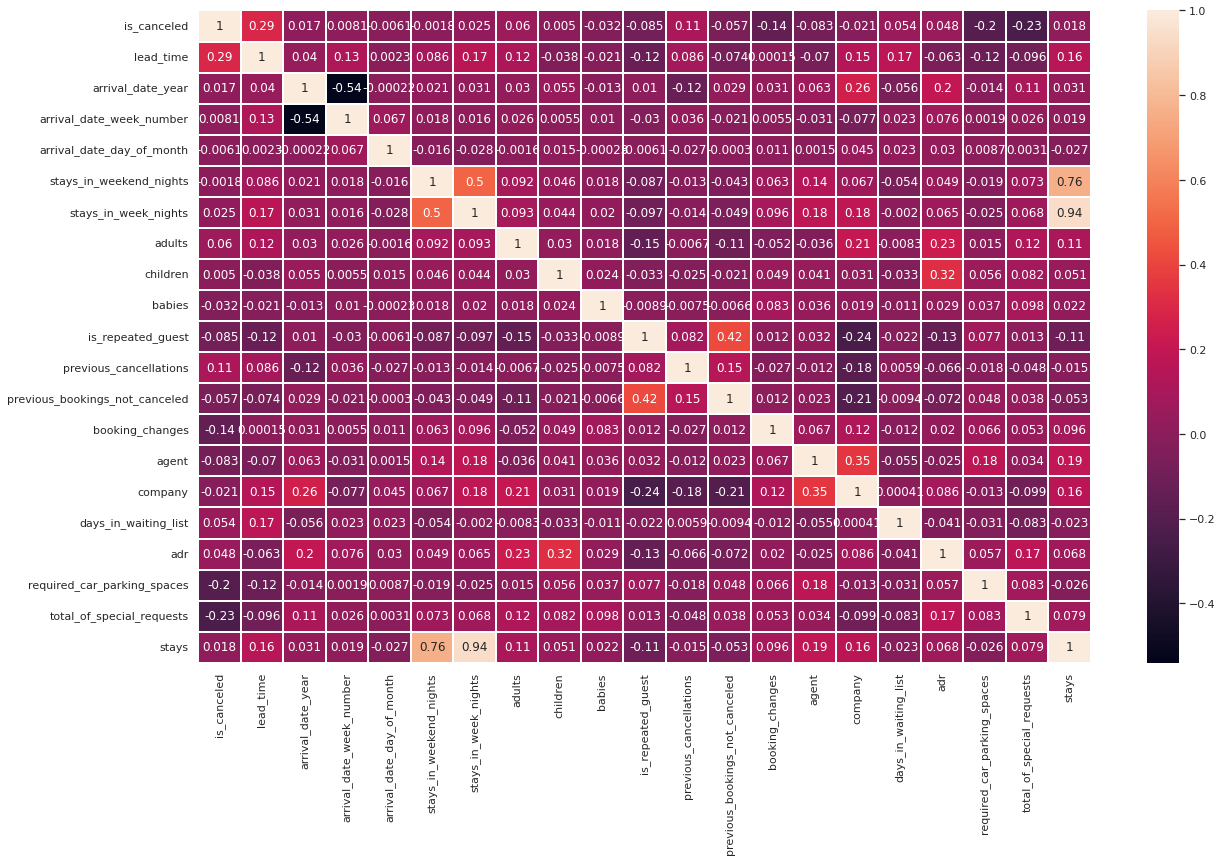

In [ ]:
#CORRELATION BETWEEN DIFFERENT COLUMNS
plt.figure(figsize=(20, 12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,linecolor='white',linewidths=1)
plt.show()

### Boxplot of reserved room types

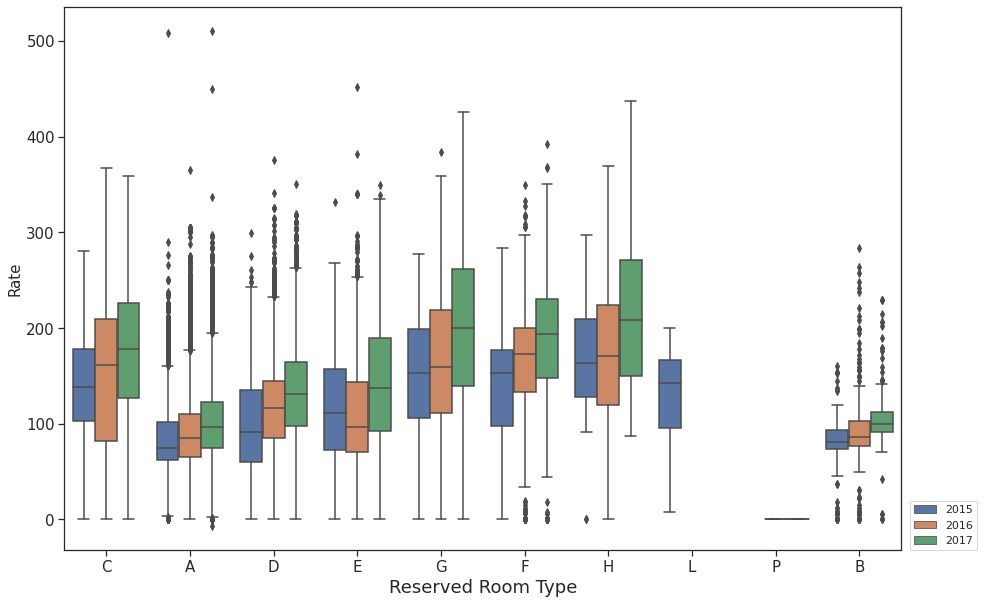

In [ ]:
#BOXPLOTS OF DAILY RATES OVER THE YEARS OF DIFFERENT ROOM TYPES
sns.set_style('ticks')
plt.figure(figsize=(15,10))
sns.boxplot(data = df[df['adr']<1000], x = 'reserved_room_type', y = 'adr', hue ='arrival_date_year', width = 0.8)
plt.xlabel("Reserved Room Type", fontsize = 18)
plt.xticks(fontsize=15)
plt.ylabel("Rate", fontsize = 15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.01, 0))

### Average Daily Rate Of Different Hotels Over The Years

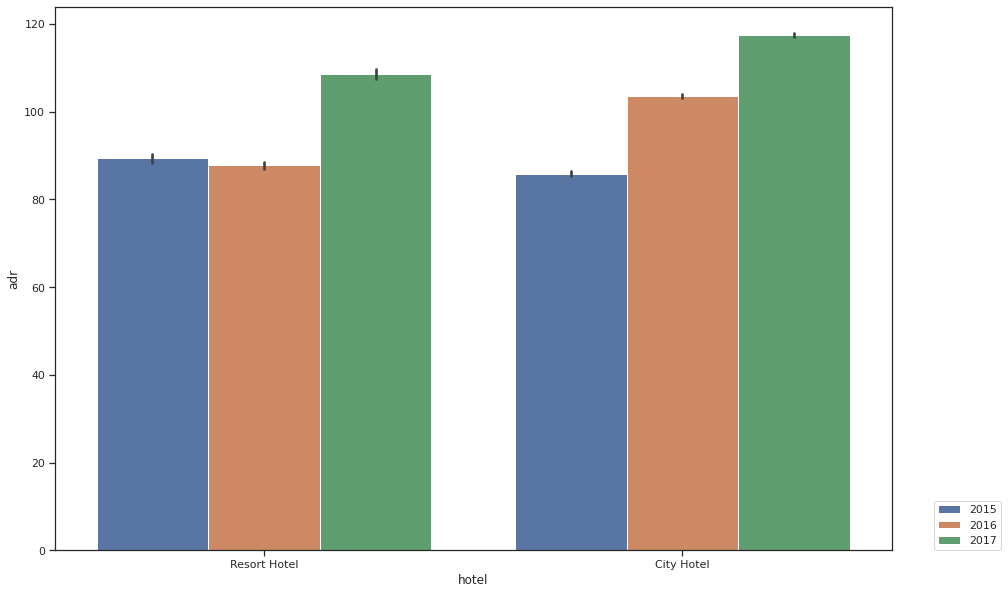

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'hotel', y = 'adr', hue ='arrival_date_year')
plt.legend(loc=(1.05, 0))

**Conclusion :** 

From the above boxplot and histogram, we can say that the average daily rate is more for room types G and H and lowest for room types A and D.It can also be observed that the prices have been increasing over the years.

## What is the best time of the year to book a hotel room?

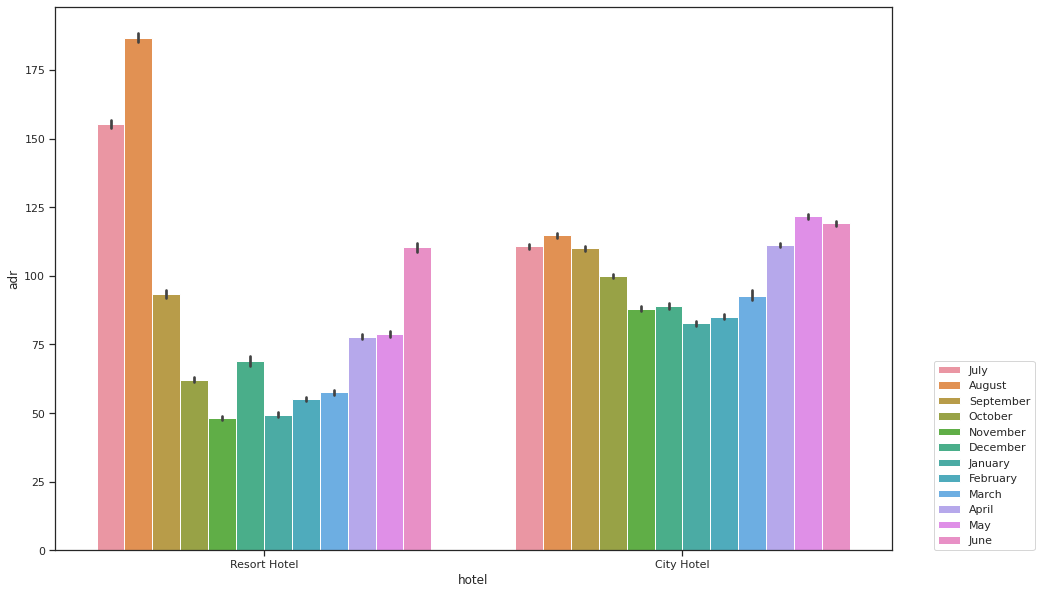

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'hotel', y = 'adr', hue ='arrival_date_month')
plt.legend(loc=(1.05, 0))

**Conclusions:**





1. The months of November, December, January and February would be the best time to book a hotel room in city hotels.
2. The months of  November,January would be the best time to book a hotel room in Resort hotels.

## What is the Optimal length of stay to get the best daily Rate?

Text(0, 0.5, 'Average Daily Rate')

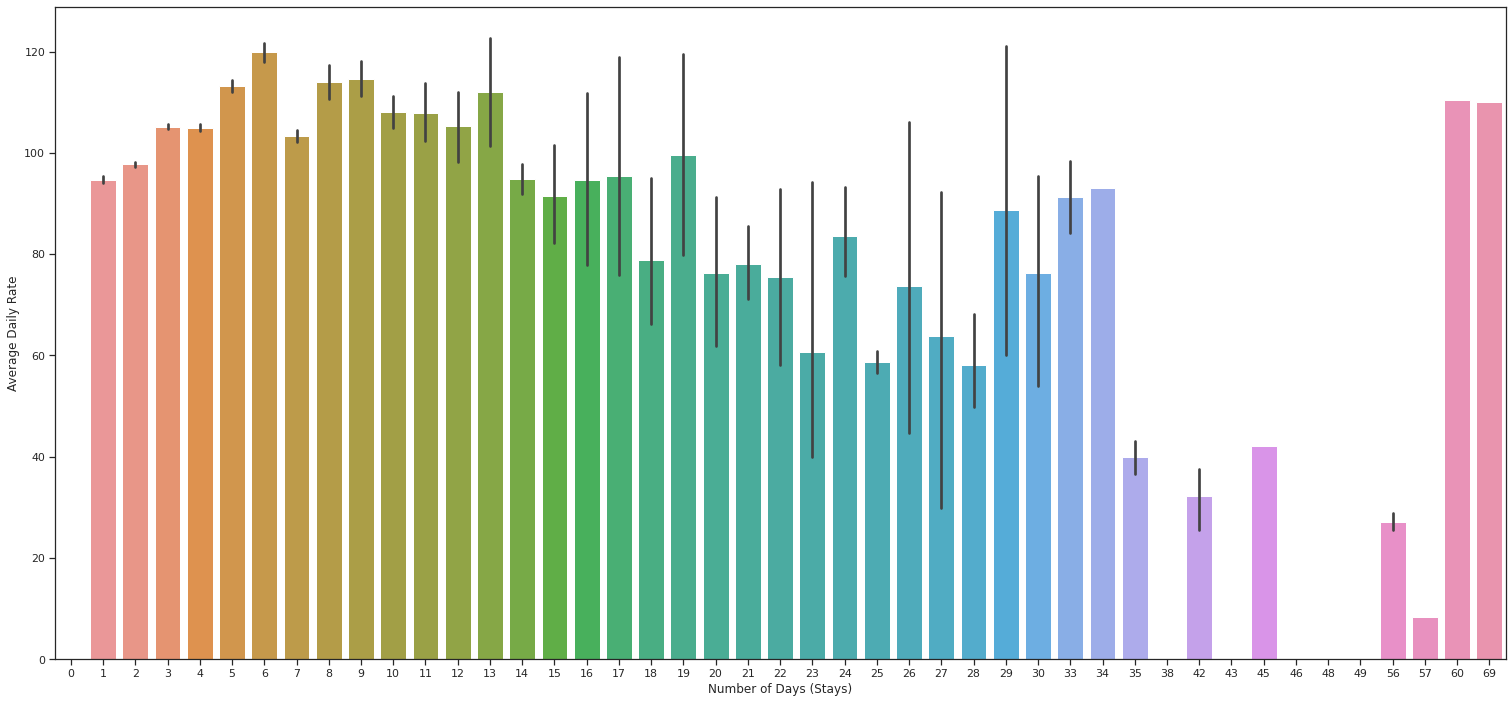

In [ ]:
plt.figure(figsize=(26,12))
sns.barplot(x = df['stays'], y = df['adr'])
plt.xlabel("Number of Days (Stays)")
plt.ylabel("Average Daily Rate")

**Conclusion :**
To get the best daily rate, A 25 days of stay seems optimal.

## Special requests

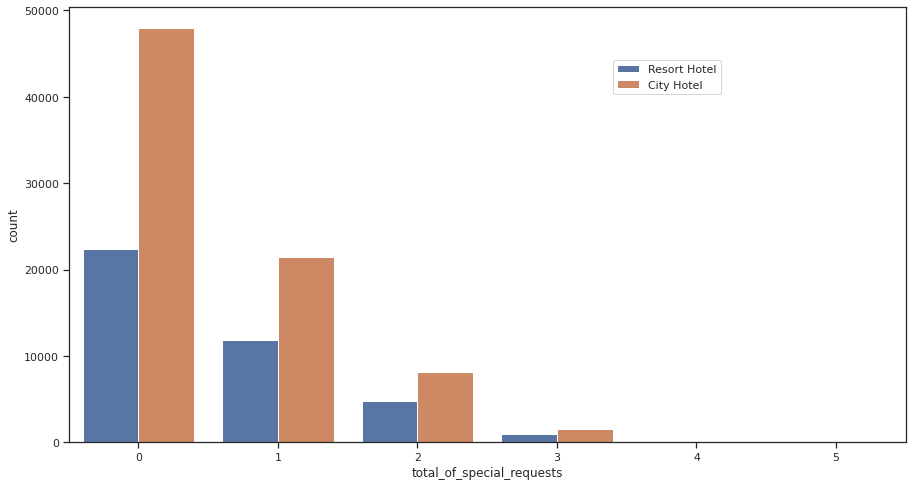

In [ ]:
#COUNT SPECIAL REQUESTS OVER THE YEARS
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'hotel')
plt.legend(loc=(.65,.8))

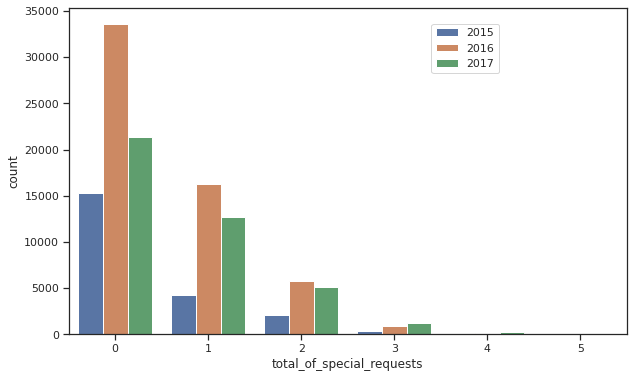

In [ ]:
#COUNT SPECIAL REQUESTS OVER THE YEARS
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'arrival_date_year')
plt.legend(loc=(.65,.8))

**Conclusion :**

There were more number of special requests in the year 2016, and In general, City hotels get more number of special requests than compared to Resort hotels.